In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.91M/2.91M [00:02<00:00, 1.43MB/s]

Extracting model files...
Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\423


In [3]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [5]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [6]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [7]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow'], dtype=object)

In [8]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [9]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [10]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246],
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [11]:
label_counts = pd.DataFrame(y_encode_transform).value_counts()
print(label_counts)

condition_text 
Cloudy             16512
Clear              13462
Rain                2595
Fog                 1190
Storm/Thunder        615
Drizzle              399
Snow                  53
Sleet                 12
Extreme Weather        5
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_encode_transform)

In [13]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(k_neighbors=4, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# pd.DataFrame(y_resampled).value_counts()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34406, 8), (3823, 8), (34406,), (3823,))

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    # tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    # tf.keras.layers.BatchNormalization(),
    # # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(96, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(80, activation='swish', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    # # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='swish'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 96)                864       
                                                                 
 batch_normalization_72 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dense_83 (Dense)            (None, 80)                7760      
                                                                 
 batch_normalization_73 (Bat  (None, 80)               320       
 chNormalization)                                                
                                                                 
 dense_84 (Dense)            (None, 64)                5184      
                                                                 
 batch_normalization_74 (Bat  (None, 64)             

In [91]:
from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.880 and logs['val_accuracy'] >= 0.8790:
            self.model.stop_training = True

custom_early_stopping = CustomEarlyStopping()

In [92]:
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=100, validation_data=(x_test_scaled, y_test), verbose=1, callbacks=[custom_early_stopping])

Epoch 1/100
538/538 [==============================] - 6s 4ms/step - loss: 1.7508 - accuracy: 0.7197 - val_loss: 1.2214 - val_accuracy: 0.7939
Epoch 2/100
538/538 [==============================] - 2s 3ms/step - loss: 1.0903 - accuracy: 0.7850 - val_loss: 0.8844 - val_accuracy: 0.8169
Epoch 3/100
538/538 [==============================] - 2s 3ms/step - loss: 0.8698 - accuracy: 0.7933 - val_loss: 0.7517 - val_accuracy: 0.8077
Epoch 4/100
538/538 [==============================] - 2s 3ms/step - loss: 0.7453 - accuracy: 0.8006 - val_loss: 0.6673 - val_accuracy: 0.8156
Epoch 5/100
538/538 [==============================] - 2s 3ms/step - loss: 0.6659 - accuracy: 0.8126 - val_loss: 0.5895 - val_accuracy: 0.8305
Epoch 6/100
538/538 [==============================] - 2s 3ms/step - loss: 0.6195 - accuracy: 0.8165 - val_loss: 0.5713 - val_accuracy: 0.8326
Epoch 7/100
538/538 [==============================] - 2s 3ms/step - loss: 0.5892 - accuracy: 0.8193 - val_loss: 0.5278 - val_accuracy: 0.8433

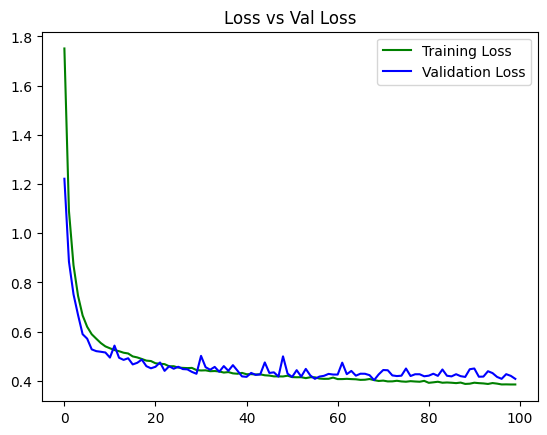

In [93]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

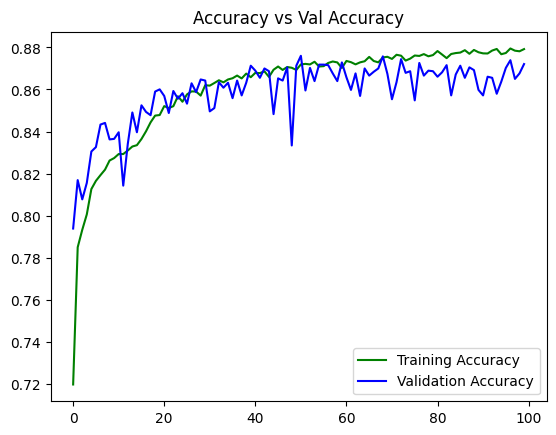

In [94]:
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_test, y_pred))

120/120 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1347
           1       0.84      0.95      0.89      1667
           2       0.00      0.00      0.00        39
           4       0.73      0.45      0.56       122
           5       0.69      0.42      0.52       275
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.14      0.02      0.03        53
           9       0.72      0.75      0.74       315

    accuracy                           0.87      3823
   macro avg       0.46      0.40      0.42      3823
weighted avg       0.85      0.87      0.86      3823



c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# model.save('classification.h5')